In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv('final.csv')
result = []
df1.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
2104,30,1.524,68.0,29.28,No,Normal,120,60,Normal,Normal,No,No,Yes,2,3
260,26,1.549,65.3,27.22,No,No_delivary,110,80,Normal,Low,No,No,No,0,1
1567,21,1.498,46.7,20.79,No,Normal,90,80,Normal,Low,No,No,Yes,1,3
2326,19,1.524,63.0,27.13,No,Normal,120,70,Normal,Normal,No,No,No,1,2
1772,32,1.499,65.5,29.17,No,Normal,100,60,Normal,Normal,No,No,No,1,2


In [3]:
for i in range(len(df1)):
    df1.loc[i,'parity'] = df1.loc[i,'Gravida'] - df1.loc[i,'Para']
df1['parity'] = df1['parity'].astype(int)

In [4]:
df1 = df1.drop(['Para','Gravida'],axis=1)
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,parity
0,25,1.4732,53.3,23.73,No,Normal,120,70,Normal,Low,No,No,No,1
1,30,1.5740,45.5,18.37,No,Normal,110,80,Normal,Normal,No,No,No,1
2,20,1.6250,52.2,19.77,No,No_delivary,120,70,Normal,Low,No,No,No,1
3,22,1.4480,48.5,23.14,No,No_delivary,110,80,Normal,Low,No,No,No,1
4,26,1.5240,50.0,21.53,No,No_delivary,110,70,Normal,Normal,No,No,No,1


In [5]:
df1['Blood Group ( is Negative?)'] = df1['Blood Group ( is Negative?)'].map({'Yes':1,'No':0})
df1['Jaundice'] = df1['Jaundice'].map({'Yes':1,'No':0})
df1['Diabetes'] = df1['Diabetes'].map({'Yes':1,'No':0})
df1['Risk'] = df1['Risk'].map({'Yes':1,'No':0})
df1['Delivery Type'] = df1['Delivery Type'].map({'No_delivary':0,'Normal':1,'C-section':2})
df1['Edema'] = df1['Edema'].map({'Normal':0,'High':1,'Modarate':2})
df1['Anemia'] = df1['Anemia'].map({'Normal':0,'Low':1,'Very-Low':2})

In [6]:
length = int(len(df1)*0.70)

train = df1[:length]
test = df1[length:]

x_train = train.drop(['Risk'],axis=1)
y_train = train.Risk

x_test = test.drop(['Risk'],axis=1)
y_test = test.Risk

precision :  0.99
recall :  1.0
f1_masure :  0.99
se :  1.0
sp :  1.0
acc :  1.0
auc :  1.0


<Figure size 144x216 with 0 Axes>

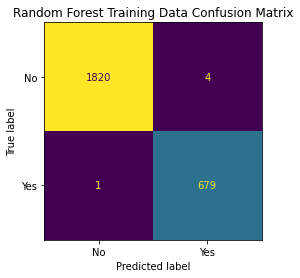

Yes as Yes (TP):  679
No as No   (TN):  1820
No as Yes  (FP):  4
yes as No  (FN):  1


In [7]:
clf = RandomForestClassifier().fit(x_train,y_train)
RF_pred = clf.predict(x_train)
RF_proba = clf.predict_proba(x_train)
tn, fp, fn, tp = confusion_matrix(y_train,RF_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(y_train)),2)
auc_ = round((roc_auc_score(y_train,RF_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)

result.append({
    'Classifier': 'Random Forest',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_train,RF_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Random Forest Training Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.97
recall :  0.88
f1_masure :  0.92
se :  0.88
sp :  0.99
acc :  0.96
auc :  0.95


<Figure size 144x216 with 0 Axes>

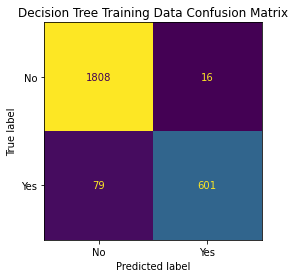

Yes as Yes (TP):  601
No as No   (TN):  1808
No as Yes  (FP):  16
yes as No  (FN):  79


In [8]:
clf = DecisionTreeClassifier(max_depth=15).fit(x_train,y_train)
DT_pred = clf.predict(x_train)
DT_proba = clf.predict_proba(x_train)
tn, fp, fn, tp = confusion_matrix(y_train,DT_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(y_train)),2)
auc_ = round((roc_auc_score(y_train,DT_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Decision Tree',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_train,DT_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Decision Tree Training Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.85
recall :  0.35
f1_masure :  0.5
se :  0.35
sp :  0.98
acc :  0.81
auc :  0.77


<Figure size 144x216 with 0 Axes>

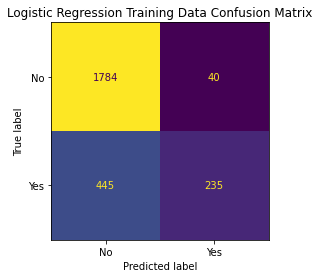

Yes as Yes (TP):  235
No as No   (TN):  1784
No as Yes  (FP):  40
yes as No  (FN):  445


In [9]:
clf = LogisticRegression().fit(x_train,y_train)
Los_pred = clf.predict(x_train)
Los_proba = clf.predict_proba(x_train)
tn, fp, fn, tp = confusion_matrix(y_train,Los_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(y_train)),2)
auc_ = round((roc_auc_score(y_train,Los_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Logistic Regression',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_train,Los_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Logistic Regression Training Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.87
recall :  0.46
f1_masure :  0.6
se :  0.46
sp :  0.97
acc :  0.84
auc :  0.9


<Figure size 144x216 with 0 Axes>

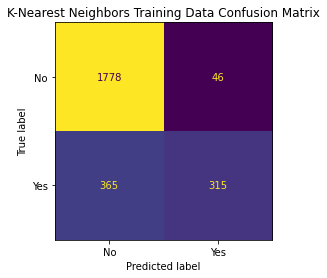

Yes as Yes (TP):  315
No as No   (TN):  1778
No as Yes  (FP):  46
yes as No  (FN):  365


In [10]:
clf = KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)
Knn_pred = clf.predict(x_train)
Knn_proba = clf.predict_proba(x_train)
tn, fp, fn, tp = confusion_matrix(y_train,Knn_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(y_train)),2)
auc_ = round((roc_auc_score(y_train,Knn_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'K-Nearest Neighbors',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_train,Knn_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('K-Nearest Neighbors Training Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.94
recall :  0.11
f1_masure :  0.2
se :  0.11
sp :  1.0
acc :  0.76
auc :  0.82


<Figure size 144x216 with 0 Axes>

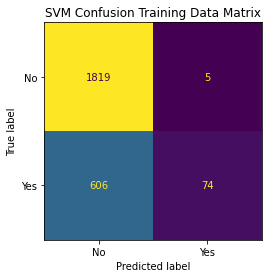

Yes as Yes (TP):  74
No as No   (TN):  1819
No as Yes  (FP):  5
yes as No  (FN):  606


In [11]:
clf = SVC(probability=True).fit(x_train,y_train)
svm_pred = clf.predict(x_train)
svm_proba = clf.predict_proba(x_train)
tn, fp, fn, tp = confusion_matrix(y_train,svm_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(y_train)),2)
auc_ = round((roc_auc_score(y_train,svm_proba[:,1])),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'SVM',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_train,svm_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('SVM Confusion Training Data Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

precision :  0.96
recall :  0.16
f1_masure :  0.27
se :  0.16
sp :  1.0
acc :  0.77
auc :  0.58


<Figure size 144x216 with 0 Axes>

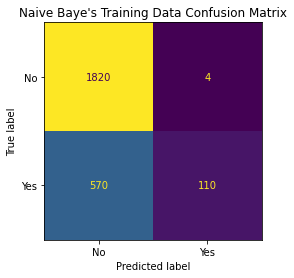

Yes as Yes (TP):  110
No as No   (TN):  1820
No as Yes  (FP):  4
yes as No  (FN):  570


In [12]:
clf = GaussianNB().fit(x_train,y_train)
gnb_pred = clf.predict(x_train)
gnb_proba = clf.predict_proba(x_train)
tn, fp, fn, tp = confusion_matrix(y_train,gnb_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
acc = round(((tp+tn)/len(y_train)),2)
auc_ = round((roc_auc_score(y_train,gnb_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Naive Baye\'s',
    'Precision': precision,
    'Se/Recall':recall,
    'Sp':sp,
    'F1-Measure':f1_masure,
    'Accuracy':acc,
    'AUC':auc_
})
plt.figure(figsize=(2, 3))
ConfusionMatrixDisplay.from_predictions(y_train,gnb_pred,display_labels=['No','Yes'],colorbar = False)
plt.title('Naive Baye\'s Training Data Confusion Matrix')
plt.show()
print('Yes as Yes (TP): ',tp)
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)

In [13]:
pd.DataFrame(result)

,Classifier,Precision,Se/Recall,Sp,F1-Measure,Accuracy,AUC
0,Random Forest,0.99,1.00,1.00,0.99,1.00,1.00
1,Decision Tree,0.97,0.88,0.99,0.92,0.96,0.95
2,Logistic Regression,0.85,0.35,0.98,0.50,0.81,0.77
3,K-Nearest Neighbors,0.87,0.46,0.97,0.60,0.84,0.90
4,SVM,0.94,0.11,1.00,0.20,0.76,0.82
5,Naive Baye's,0.96,0.16,1.00,0.27,0.77,0.58


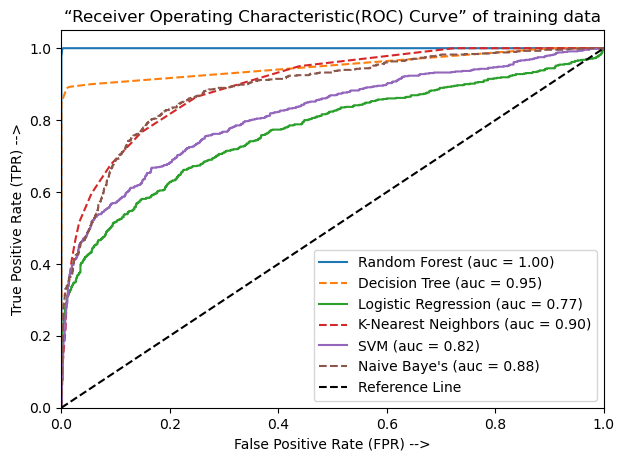

In [14]:
plt.figure(figsize=(7, 5), dpi=100)

def plot_roc(name,pred,i):
    fpr, tpr, threshold = roc_curve(y_train, pred)
    auc_ = auc(fpr,tpr)
    
    if i%2==0:
        plt.plot(fpr,tpr, linestyle='--', label = name+' (auc = %0.2f)' % auc_)
    else:
        plt.plot(fpr,tpr, linestyle='-', label = name+' (auc = %0.2f)' % auc_)

plot_roc('Random Forest',RF_proba[:,1],1)
plot_roc('Decision Tree',DT_proba[:,1],2)
plot_roc('Logistic Regression',Los_proba[:,1],3)
plot_roc('K-Nearest Neighbors',Knn_proba[:,1],4)
plot_roc('SVM',svm_proba[:,1],5)
plot_roc('Naive Baye\'s',gnb_proba[:,1],6)


plt.plot([0,1],[0,1],'k--',label = 'Reference Line')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('“Receiver Operating Characteristic(ROC) Curve” of training data')
plt.xlabel('False Positive Rate (FPR) -->')
plt.ylabel('True Positive Rate (TPR) -->')

plt.legend()

plt.savefig('./con_mat/all trainng result ROC-AUC.jpg')
plt.show()